# The California housing dataset

In [34]:
import numpy as np
import pandas as pd                      
import matplotlib.pyplot as plt          # plotting library
import seaborn as sns                    # plotting library

from sklearn.datasets import load_boston # to load the dataset

from sklearn.linear_model import LinearRegression, Ridge, Lasso # regression model
from sklearn.preprocessing import PolynomialFeatures, scale     # preprocessing steps

from sklearn.model_selection import train_test_split, cross_val_score # cross validation
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In this notebook, we will quickly present the dataset known as the “California housing dataset”. This dataset can be fetched from internet using scikit-learn.

In [35]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
print(df.DESCR)

dataset_np = np.c_[df['data'], df['target']]

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Train Test Split

In [36]:
# III. Splitting Data to Test & Train set :
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices], data[test_indices]

In [37]:
train_set, test_set = split_train_test(dataset_np, 0.2)
print(len(train_set), "train +", len(test_set), "test")

x_train = train_set[:,:8]
y_train = train_set[:,8]
x_test = test_set[:,:8]
y_test = test_set[:,8]

16512 train + 4128 test


In [38]:
print('xtrain: ',x_train.shape,'\n')
print('xtest: ',x_test.shape,'\n')
print('ytrain: ',y_train.shape,'\n')
print('ytest: ',y_test.shape)

xtrain:  (16512, 8) 

xtest:  (4128, 8) 

ytrain:  (16512,) 

ytest:  (4128,)


# Create DataFrame

In [39]:
df = pd.DataFrame(data = np.c_[xtrain, ytrain],
                  index=list(range(0,16512,1)),
                  columns=['average_income', 'housing_average_age', 'average_rooms', 'average_bedrooms', 'population',
                           'average_occupation', 'latitude', 'longitude','average_house_value'])

In [40]:
print(df)

       average_income  housing_average_age  average_rooms  average_bedrooms  \
0              2.2125                 42.0       5.855219          1.245791   
1              2.5000                 29.0       6.333333          1.105691   
2              6.9418                  8.0       6.741036          1.007968   
3              1.8571                 39.0       4.914343          1.053785   
4              4.3021                  8.0       5.927083          1.010417   
...               ...                  ...            ...               ...   
16507          4.7708                 19.0       4.979885          1.017241   
16508          3.6412                 15.0       5.344209          1.092985   
16509          2.8357                 17.0       5.308256          1.059254   
16510          5.2405                 36.0       6.335000          0.955000   
16511          5.0887                 46.0       5.797115          0.985573   

       population  average_occupation  latitude  lo

# EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   average_income       16512 non-null  float64
 1   housing_average_age  16512 non-null  float64
 2   average_rooms        16512 non-null  float64
 3   average_bedrooms     16512 non-null  float64
 4   population           16512 non-null  float64
 5   average_occupation   16512 non-null  float64
 6   latitude             16512 non-null  float64
 7   longitude            16512 non-null  float64
 8   average_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


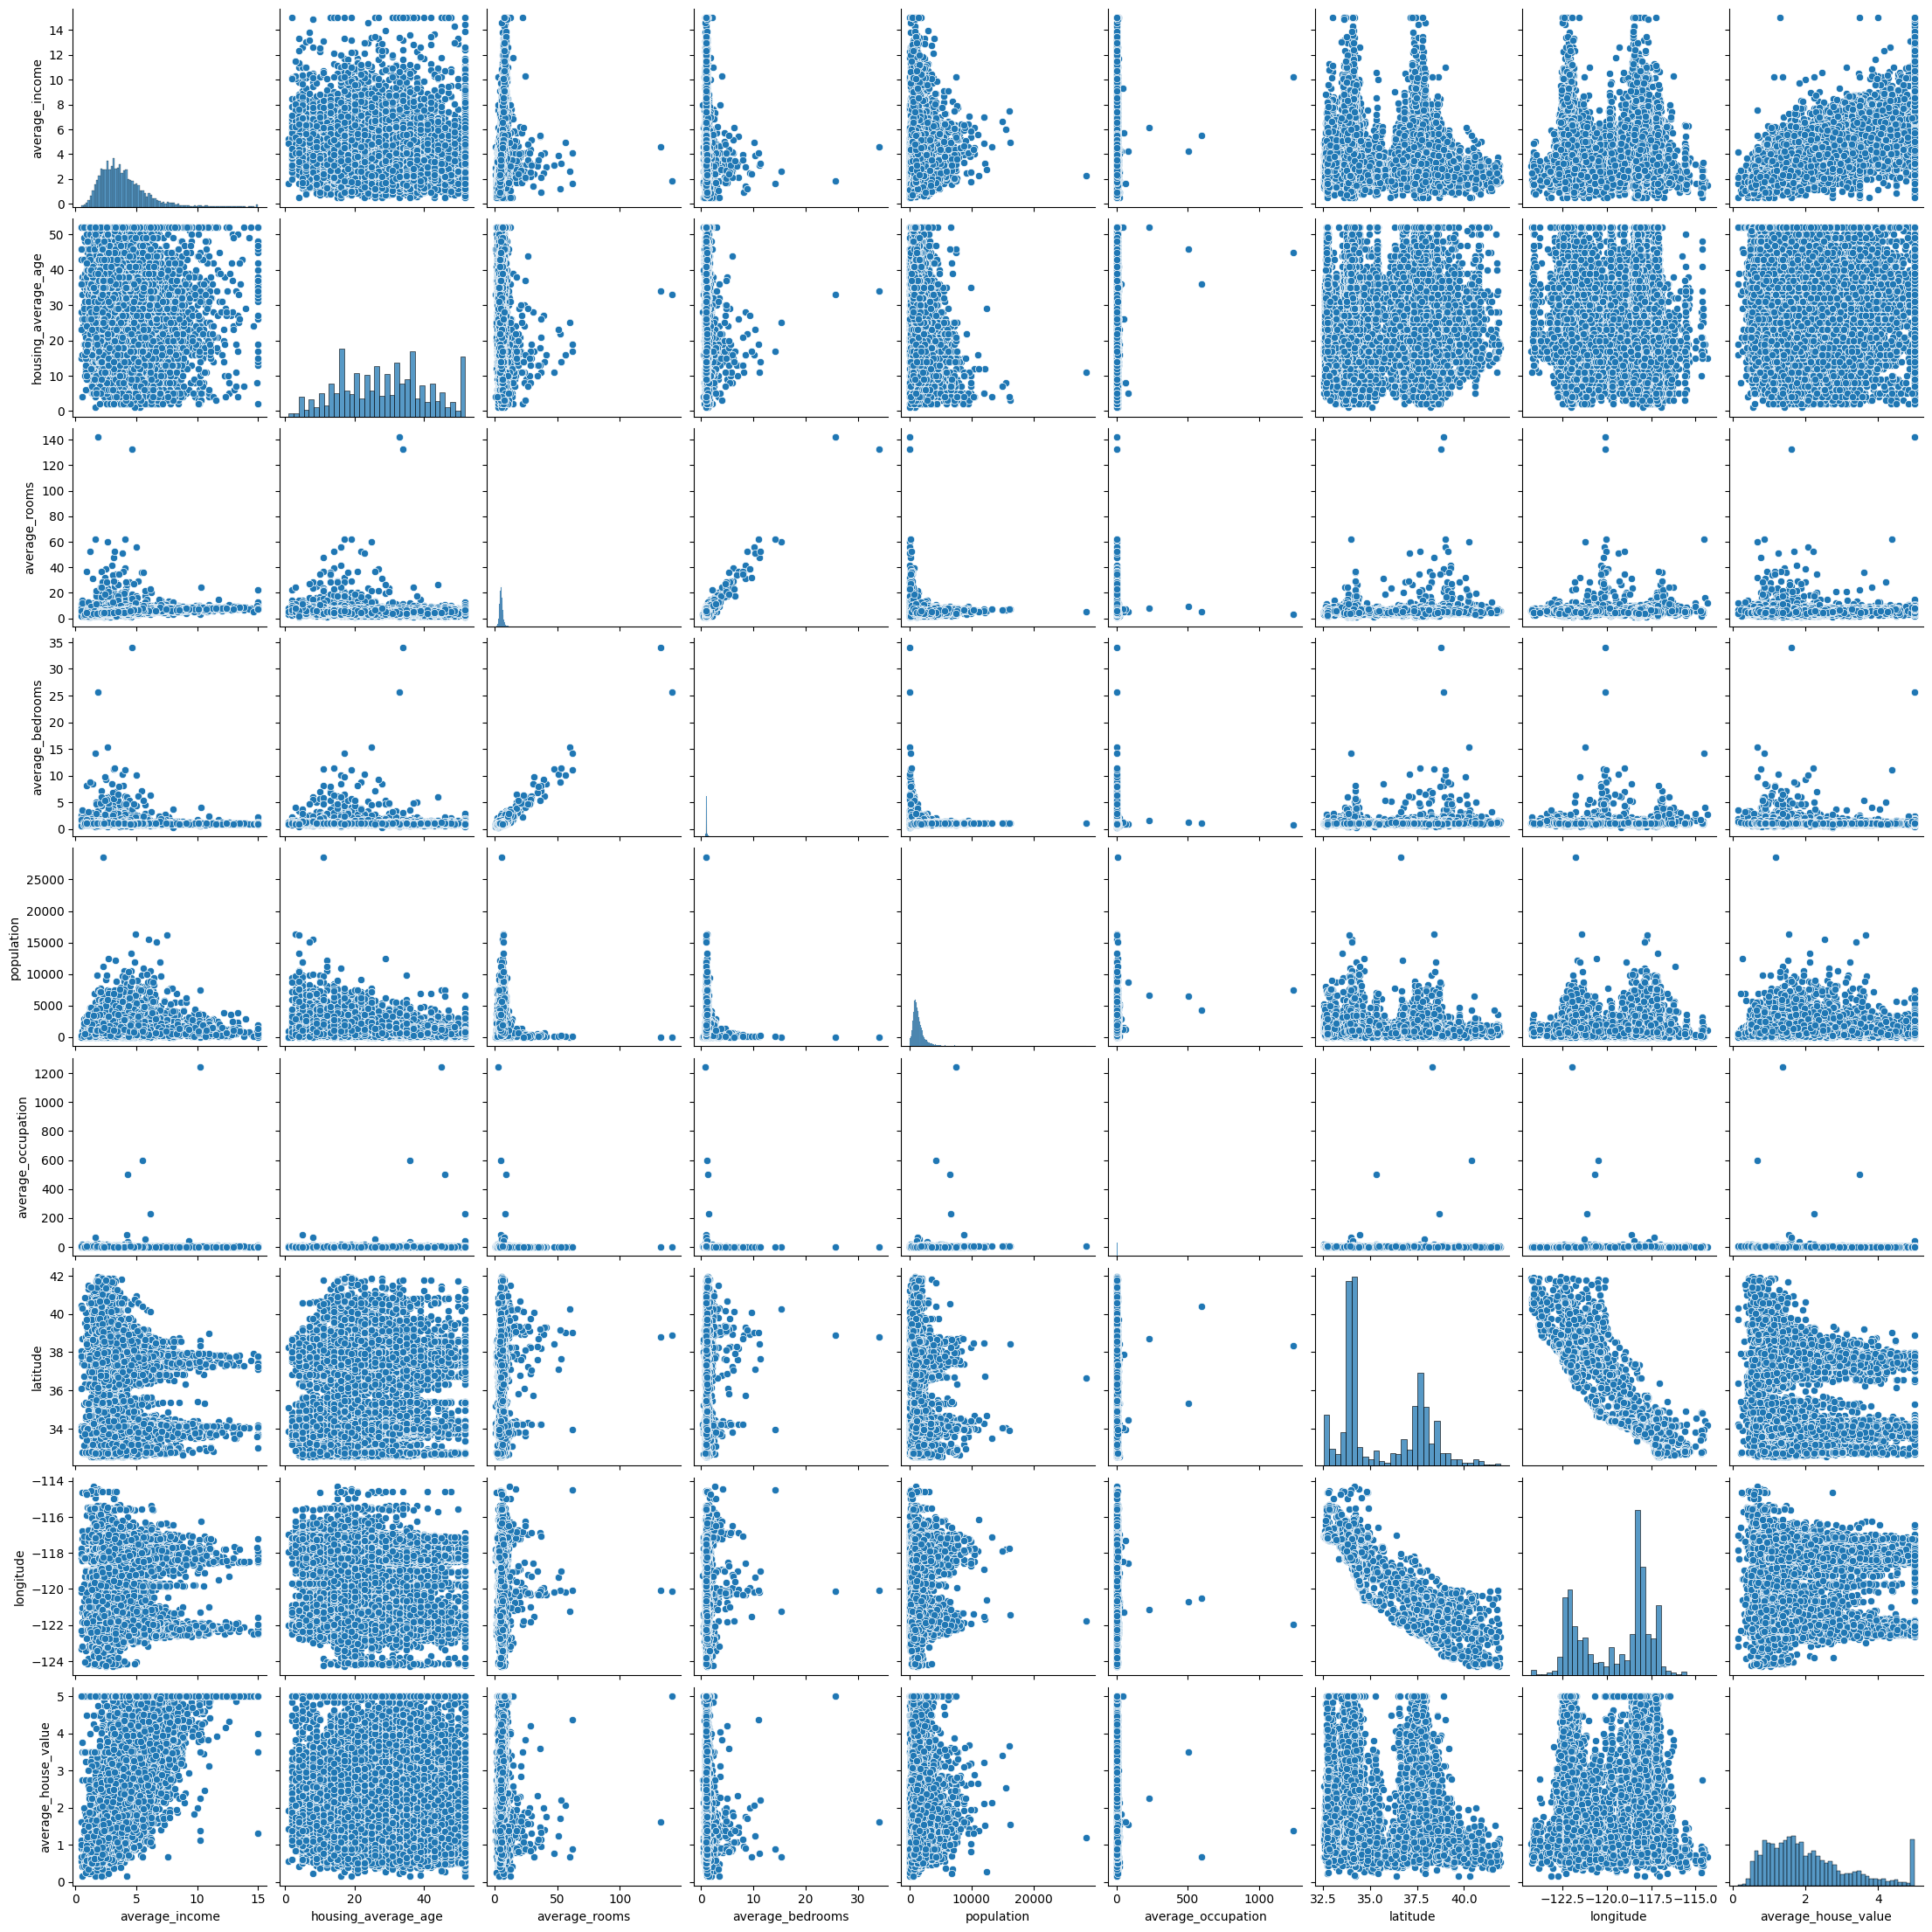

In [20]:
sns.pairplot(df)

# Data Preprocessing
prepare your dataset for modeling

do necessary changes like feature selection, feature scaling etc (when needed)
create/transform features (if necessary)
drop or impute missing values (if any)
Encoding catergorical features (if any)
identifying or eliminating outliers (if any)
Is there any missing value in the dataset? which variable contains missing value? How to fill/impute missing values?

In [41]:
df.isnull().sum()

average_income         0
housing_average_age    0
average_rooms          0
average_bedrooms       0
population             0
average_occupation     0
latitude               0
longitude              0
average_house_value    0
dtype: int64

There is no missing values! In practice, this is very rare, we expect to have some missing entries!

# Perform Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Model's Performance

In [46]:
# Training score
lr_score_train  = lr.score(x_train, y_train)
lr_score_test = lr.score(x_test, y_test)

print('score on training dataset usnig linear regression model:', round(lr_score_train,3))
print('score on test dataset using linear regression model:', round(lr_score_test,3))

score on training dataset usnig linear regression model: 0.608
score on test dataset using linear regression model: 0.595


# The model is probably underfitted!

In [48]:
# Calculate score explicitly without using module/function
import numpy as np
mean_y = np.mean(y_train)
squared_errors_mean = np.sum((y_train - mean_y)**2)
squared_errors_model = np.sum((y_train -lr.predict(x_train))**2)
R2 = 1 - (squared_errors_model / squared_errors_mean)
print ('Computed R2', round(R2,3))

Computed R2 0.608


Show the coefficients
Find the coefficients of multiple linear regression model for predicting house price.

In [49]:
lr.intercept_,  lr.coef_

(-36.45952254209895,
 array([ 4.42977622e-01,  9.53301252e-03, -1.19019505e-01,  6.51432585e-01,
        -5.10843942e-06, -3.99407499e-03, -4.14604004e-01, -4.28752917e-01]))

# Encoding Qualitative Variable (if any)
Which method will you prefer for encoding categorical varialbes? Label Econding or One-hot Encoding? Why?

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
OHE = OneHotEncoder(sparse=False)

In [55]:
qualitative = ['red', 'red', 'green', 'blue', 'red', 'blue', 'blue', 'green'] # catergorical/qualitative data

labels = LE.fit_transform(qualitative).reshape(-1, 1) # Label encoding
print(LE.classes_)
print(labels)
print(OHE.fit_transform(labels)) # One Hot Encoding

['blue' 'green' 'red']
[[2]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


Create dataframe

In [56]:
df_cat_en=pd.DataFrame(data=OHE.fit_transform(labels), columns = LE.classes_)
# df_cat_en

One Hot Encoding using get_dummies from pandas

In [57]:
cat = pd.DataFrame(qualitative, columns=['colors'])
df_cat_gd = pd.get_dummies(cat)
df_cat_gd

colors_blue  colors_green  colors_red
0            0             0           1
1            0             0           1
2            0             1           0
3            1             0           0
4            0             0           1
5            1             0           0
6            1             0           0
7            0             1           0

# Polynomial Regression
Is the model overfitted/underfitted? How to improve model performance?

In [61]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(x_train) # Transform features to polynomial of degree 2
print('\nchange the dimension of feature matrix: ',x_train.shape, 'to', X_train_poly.shape,'\n')

PR = LinearRegression()
PR.fit(X_train_poly, y_train) # Fit the polynomial regression model

r2 = PR.score(X_train_poly, y_train) # scores on train data
print('Train R2 score for polynomial regression:',r2)

X_test_poly = pf.transform(x_test) # transform test features
r2_test = PR.score(X_test_poly, y_test)# scores on test data
print('Test R2 score for polynomial regression:',r2_test)


change the dimension of feature matrix:  (16512, 8) to (16512, 45) 

Train R2 score for polynomial regression: 0.6917045401583939
Test R2 score for polynomial regression: -2.2370234168751253


The model is overfitted! Since the training score is higher than the test score.

# Cross Validation

In [63]:
#perform cross validation in linear regression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores_lr = cross_val_score(lr, x_train, y_train, scoring='r2', cv=5)
scores_lr

array([0.60375359, 0.60470163, 0.63554712, 0.10389887, 0.58064754])

In [64]:
#perform cross validation in polynomial regression
PR = LinearRegression()
PR.fit(X_train_poly, y_train)
scores_poly = cross_val_score(PR, X_train_poly, y_train, scoring='r2', cv=5)
scores_poly

array([   0.67713918,    0.67494976,    0.48752444, -275.12863898,
          0.57977081])

In [66]:
# lasso with linear features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)
lasso.fit(x_train, y_train)
print('test score:',lasso.score(x_test, y_test))
print('train score:',lasso.score(x_train, y_train))

test score: -7.057927533526964e-07
train score: 0.0


In [67]:
# cross validation with LASSO for linear features
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)

scores_lasso = cross_val_score(lasso, x_train, y_train, scoring='r2', cv=5)
scores_lasso

array([-3.68503791e-05, -7.94869026e-04, -9.70331932e-04, -1.59348515e-04,
       -1.00787518e-04])

# Regularization
Is regularization techniques improve the performance of your model? which technique do you prefer?
L1 : LASSO

In [68]:
# LASSO with polynomial features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)
lasso.fit(X_train_poly, y_train)

print('train score (L1):',lasso.score(X_train_poly, y_train))
print('test score (L1):',lasso.score(X_test_poly, y_test))

train score (L1): 0.4517000146943444
test score (L1): 0.4472953387541784


In [69]:
#perform cross validation in LASSO with polynomial features
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)
scores_poly_lasso = cross_val_score(lasso, X_train_poly, y_train, scoring='r2', cv=5)
scores_poly_lasso

array([0.43032864, 0.4583332 , 0.47744484, 0.41382427, 0.42857275])

# L2: Ridge

In [70]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)
rr.fit(x_train,y_train)
print('train score (L2):',rr.score(x_train, y_train))
print('test score (L2):',rr.score(x_test, y_test))
print(rr.coef_)

train score (L2): 0.608420323019861
test score (L2): 0.5950167305624827
[ 4.42360843e-01  9.54331749e-03 -1.17835827e-01  6.45300912e-01
 -5.06794526e-06 -3.99270013e-03 -4.14527014e-01 -4.28587830e-01]


In [71]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)
rr.fit(X_train_poly,y_train)
print('train score (L2) with polynomial features:',rr.score(X_train_poly, y_train))
print('test score (L2) with polynomial features:',rr.score(X_test_poly, y_test))
print('\n')
print(rr.coef_)

train score (L2) with polynomial features: 0.6846084867571247
test score (L2) with polynomial features: -0.7719754633397353


[ 0.00000000e+00 -2.53892953e+00 -7.20188936e-01 -3.74759253e-02
 -7.78600523e-03 -5.27402701e-04  6.26435617e-01  1.65838617e+00
 -4.35256795e-01 -2.48431731e-02  3.05030913e-03  3.31036264e-02
 -1.67981231e-01  6.35531871e-05 -3.21176482e-02 -5.75015228e-02
 -4.34525531e-02  1.77990446e-04 -2.74926606e-03  1.71968125e-02
  3.33565774e-06 -3.58858225e-03 -8.35150314e-03 -8.43514166e-03
  8.64681500e-03 -7.04518663e-02 -7.60614343e-05  3.01194869e-02
  2.30485790e-02  8.33768729e-03  1.41936142e-01  6.33068794e-04
 -9.53507110e-02 -1.03463768e-01 -3.77754600e-02  2.75213038e-09
  2.14967941e-05  1.35636789e-05  5.10853408e-06  2.18616252e-04
  5.37354979e-02  2.17180085e-02  3.27309273e-02  3.53367244e-02
  4.14526593e-03]


In [72]:
# cross validation linear regression
from sklearn.model_selection import cross_val_score
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)

scores_rr = cross_val_score(rr, x_train, y_train, scoring='r2', cv=5)
scores_rr

array([0.60372603, 0.60467407, 0.63551194, 0.10312826, 0.58098586])

In [73]:
#perform cross validation in polynomial regression
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)
scores_poly_rr = cross_val_score(rr, X_train_poly, y_train, scoring='r2', cv=5)
scores_poly_rr

array([ 6.77582419e-01,  6.73348019e-01,  4.97784720e-01, -5.57003524e+02,
        5.84272370e-01])

# Hyperparameter tuning using gridsearchcv()

In [74]:
# lasso with linear features
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
# lasso.fit(X_train, y_train)

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.1, 0.0001,0.001,0.01,0.2], 'max_iter':[10,50,100,500]}


gs = GridSearchCV(lasso,param_grid,cv=10)
gs.fit(x_train, y_train)
gs.best_params_
gs.cv_results_['mean_test_score'].min(), gs.cv_results_['mean_test_score'].max()

(-0.0005701278518941422, 0.2893782380248773)

scores near zero indicate poor performance

scores closer to one indicates that the model performing better!

In [75]:
# ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rr = Ridge()

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.0001,0.001,0.01,0.1,0.2], 'max_iter':[10,50,100,500]}

gs = GridSearchCV(rr,param_grid,cv=10)
gs.fit(x_train, y_train)
print(gs.best_params_)
gs.cv_results_['mean_test_score'].min(), gs.cv_results_['mean_test_score'].max()

{'alpha': 60, 'max_iter': 10, 'tol': 0.0001}


(0.6038028425911687, 0.6040074814911146)

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rr = Ridge()

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.0001,0.001,0.01,0.1,0.2], 'max_iter':[100,10]}

gs = GridSearchCV(rr,param_grid,cv=10)

gs.fit(X_train_poly, y_train)
print(gs.best_params_)
print('\nminimum score is: ', gs.cv_results_['mean_test_score'].min())
print('\nmaximum score is: ', gs.cv_results_['mean_test_score'].max(),'\n')
# print(gs.cv_results_['mean_test_score'])

cv_result = pd.DataFrame(gs.cv_results_)
cv_result = cv_result[['param_alpha', 'param_max_iter','param_tol','rank_test_score', 
                       'mean_test_score', 'std_test_score','split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score',
                       'split7_test_score','split8_test_score','split9_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}

minimum score is:  -25.560667001775972

maximum score is:  -12.82539995316417 



param_alpha param_max_iter param_tol  rank_test_score  mean_test_score  \
59         100             10       0.2                1       -12.825400   
50         100            100    0.0001                1       -12.825400   
51         100            100     0.001                1       -12.825400   
52         100            100      0.01                1       -12.825400   
53         100            100       0.1                1       -12.825400   
58         100             10       0.1                1       -12.825400   
55         100             10    0.0001                1       -12.825400   
56         100             10     0.001                1       -12.825400   
57         100             10      0.01                1       -12.825400   
54         100            100       0.2                1       -12.825400   
40          90            100    0.0001               11       -12.843870   
42          90            100      0.01               11       -12.843870   
43          90            100       0.1               11       -12.843870   
41          90            100     0.001               11       -12.843870   
46          90             10     0.001               11       -12.843870   
47          90             10      0.01               11       -12.843870   
48          90             10       0.1               11       -12.843870   
49          90             10       0.2               11       -12.843870   
45          90             10    0.0001               11       -12.843870   
44          90            100       0.2               11       -12.843870   
30          60            100    0.0001               21       -12.935212   
39          60             10       0.2               21       -12.935212   
38          60             10       0.1               21       -12.935212   
37          60             10      0.01               21       -12.935212   
36          60             10     0.001               21       -12.935212   
35          60             10    0.0001               21       -12.935212   
34          60            100       0.2               21       -12.935212   
33          60            100       0.1               21       -12.935212   
32          60            100      0.01               21       -12.935212   
31          60            100     0.001               21       -12.935212   
29          50             10       0.2               31       -12.991042   
27          50             10      0.01               31       -12.991042   
26          50             10     0.001               31       -12.991042   
25          50             10    0.0001               31       -12.991042   
24          50            100       0.2               31       -12.991042   
23          50            100       0.1               31       -12.991042   
22          50            100      0.01               31       -12.991042   
21          50            100     0.001               31       -12.991042   
20          50            100    0.0001               31       -12.991042   
28          50             10       0.1               31       -12.991042   
10           5            100    0.0001               41       -16.175601   
11           5            100     0.001               41       -16.175601   
12           5            100      0.01               41       -16.175601   
14           5            100       0.2               41       -16.175601   
13           5            100       0.1               41       -16.175601   
16           5             10     0.001               41       -16.175601   
17           5             10      0.01               41       -16.175601   
18           5             10       0.1               41       -16.175601   
19           5             10       0.2               41       -16.175601   
15           5             10    0.0001               41       -16.175601   
9            1             10       0.2               51       -25.560667   

Index(['param_alpha', 'param_max_iter', 'param_tol', 'rank_test_score',
       'mean_test_score', 'std_test_score', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score'],
      dtype='object')


We perform multiple linear regression to predict the house price based on the given features. The performance indicates model is probably underfitted. we then tried polynomial regression and found that this model is overfitted. to overcome overfitting issue we apply regularization techniques L1 and L2 and found that L2 (Ridge) regularization with polynomial feature perform better in this perticular case. After that we perform hyperparameter tuning to obtain the optimum model.
Finally we got best regression model with optimum hyperparameters applying L2 with polynomial features.

# Model performance evaluation with the best found model in , Multiple leniear regression ,grid search and cross-validation

In [77]:
# Multiple Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Multiple Linear Regression MSE:", mse)

Multiple Linear Regression MSE: 0.5238711381530193


In [79]:
rr = Ridge()
gs = GridSearchCV(rr,param_grid,cv=10)
gs.fit(X_train_poly, y_train)
print(gs.best_params_)

# test score using best found model
gs.score(X_test_poly,y_test)

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}


-0.5582068459873906

# Prediction

In [80]:
rr = Ridge()
gs = GridSearchCV(rr,param_grid,cv=10)
gs.fit(X_train_poly, y_train)
print(gs.best_params_)

# predict y value with test feature values using best found model

y_pred = gs.predict(X_test_poly)

price = pd.DataFrame({"Price_actual":y_test,
                   "Price_predicted": y_pred})

display(price)

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}


Price_actual  Price_predicted
0            1.800         1.355974
1            1.563         1.938276
2            1.568         1.711829
3            2.493         2.694423
4            0.886         1.810384
...            ...              ...
4123         1.484         2.710305
4124         0.614         0.713098
4125         1.992         2.265307
4126         2.688         1.140058
4127         2.653         2.341658

[4128 rows x 2 columns]

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

MAE =  0.4978148225090291
MSE =  2.0155575453975008
RMSE =  1.4197033300649473
r_squared =  -0.5582068459873906


Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
Coefficient of determination or R-squared represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

# How to get the regression coefficients of finally selected model

In [ ]:
gs.best_params_

In [ ]:
rr_final=Ridge(alpha= 100, max_iter= 100, tol= 0.0001)
rr_final.fit(X_train_poly,y_train)
print(rr_final.intercept_)
rr_final.coef_

# Compare the predicted target values with actual value

In [ ]:
plt.scatter(price['Price_actual'],price['Price_predicted'], color = 'green', alpha = 0.3)
plt.plot(price['Price_actual'],price['Price_actual'], color = 'blue', alpha = 1)
plt.legend(['Actual Price','Predicted Price'])

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicte Price')
plt.show()
plt.tight_layout()